In [1]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *


from sklearn.metrics import mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import *
import os

In [106]:
#see if gpu is avaible
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [23]:
#get data and filtere it 
frame = pd.read_csv(r'newweekcount2.csv')
df = pd.DataFrame(frame)
df.drop(df[df['year'] == 2020].index, inplace = True) #'REMOVE2020'
#df.drop(df[df['year'] == 2015].index, inplace = True) #remove 2015
#df.drop(df[df['year'] == 2019].index, inplace = True) #'REMOVE2020'
test = pd.DataFrame(df)
 
#reading and dumming datta
col = list(df.columns.values)

 
df.shape


(10471, 8)

In [24]:
#get weather data
wframe = pd.read_csv(r'weather.csv')
weather = pd.DataFrame(wframe, columns=["year","week","tempC"])
weather.head()

year  week  tempC
0  2015    39  21.86
1  2015    40  18.14
2  2015    41  19.57
3  2015    42  16.29
4  2015    43  16.57

In [25]:
#merge both DF
df = pd.merge(df,weather,on=['year','week'],how='outer').dropna()
#df = df.reset_index()
print(df[df.index.duplicated()])
 
df.shape,test.shape

Empty DataFrame
Columns: [year, week, station, lat, long, anzahl, week1anzahl, week2anzahl, tempC]
Index: []


((10471, 9), (10471, 8))

In [76]:
stationnamesframe =   test.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['station'])['station'].to_numpy().tolist()
print(stationnames)

['5 Corners Library', 'Baldwin at Montgomery', 'Bayside Park', 'Brunswick St', 'Central Ave', 'Christ Hospital', 'City Hall', 'Columbia Park', 'Dey St', 'Essex Light Rail', 'Exchange Place', 'Garfield Ave Station', 'Grove St PATH', 'Hamilton Park', 'Heights Elevator', 'Hilltop', 'JC Medical Center', 'Liberty Light Rail', 'Lincoln Park', 'MLK Light Rail', 'McGinley Square', 'NJCU', 'Newark Ave', 'Newport PATH', 'Newport Pkwy', 'North St', 'Oakland Ave', 'Paulus Hook', 'Pershing Field', 'Riverview Park', 'Sip Ave', 'Union St', 'Van Vorst Park', 'Warren St', 'West Side Light Rail', 'Jersey & 3rd', 'Jersey & 6th St', 'Lafayette Park', 'Morris Canal', 'Bethune Center', 'Columbus Drive', 'Danforth Light Rail', 'Dixon Mills', 'Leonard Gordon Park', 'Manila & 1st', 'Marin Light Rail', 'Monmouth and 6th', 'Astor Place', 'Brunswick & 6th', 'JCBS Depot', 'Communipaw & Berry Lane', 'York St', 'Harborside', 'Journal Square', 'Washington St', 'Bergen Ave', 'Fairmount Ave', 'Glenwood Ave', 'Grand St'

In [27]:
stationframe

station        lat       long
0                    City Hall  40.717733 -74.043845
1               Exchange Place  40.716247 -74.033459
2                Hamilton Park  40.727596 -74.044247
3                      Sip Ave  40.730743 -74.063784
4              Christ Hospital  40.734786 -74.050444
..                         ...        ...        ...
59                    Grand St  40.715178 -74.037683
60              Jackson Square  40.711130 -74.078900
61                     Sip Ave  40.730897 -74.063913
62  Hoboken Ave at Monmouth St  40.735208 -74.046964
63  Columbus Dr at Exchange Pl  40.716870 -74.032810

[64 rows x 3 columns]

In [28]:
#get input and output
x = df.drop("anzahl",axis=1).drop("station",axis=1)
y = df["anzahl"]

In [29]:
#split data into train and test
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=False)

In [34]:
#normalisie data
ct = make_column_transformer(
 (MinMaxScaler(),["year","week","lat","long","tempC" ]) , remainder="passthrough"
 )

ct.fit(x_train)

x_train_normalized = ct.transform(x_train)

x_test_normalized = ct.transform(x_test)

x_train_normalized.shape

(8376, 7)

In [2]:
#load saved model if avaiable 
with tf.device('/device:CPU:0'):
    model = keras.models.load_model('Model3')

In [2]:
#create Model structure
with tf.device('/device:CPU:0'):
    model = Sequential()
    model.add(Dense(28, kernel_initializer='normal',  activation='relu', input_shape=(7,) ))
    #model.add(Dropout(0.3))
    model.add(Dense(8, kernel_initializer='normal',activation='relu'))
   # model.add(Dropout(0.3))
    model.add(Dense(8, kernel_initializer='normal',activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(1, kernel_initializer='normal',activation=None))

In [3]:
#set model loss and optimizer
with tf.device('/device:CPU:0'):
    model.compile(optimizer= Adam(learning_rate=0.00001),loss='mae', metrics=['mae','mape'])

In [28]:
#checkpoint to save best Model which isnt overfitted
checkpoint = ModelCheckpoint('Model2', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [69]:
#train Model
with tf.device('/device:CPU:0'):
    history = model.fit(x_train_normalized, y_train.values, epochs=100 , batch_size=1,shuffle=False   )

Epoch 1/100
8376/8376 [==============================] - 9s 1ms/step - loss: 111.0799 - mae: 111.0799 - mape: 99.2255
Epoch 2/100
8376/8376 [==============================] - 9s 1ms/step - loss: 94.2587 - mae: 94.2587 - mape: 81.6152
Epoch 3/100
8376/8376 [==============================] - 9s 1ms/step - loss: 34.6541 - mae: 34.6541 - mape: 41.7875
Epoch 4/100
8376/8376 [==============================] - 9s 1ms/step - loss: 23.0835 - mae: 23.0835 - mape: 42.8792
Epoch 5/100
8376/8376 [==============================] - 9s 1ms/step - loss: 23.0610 - mae: 23.0610 - mape: 42.7127
Epoch 6/100
8376/8376 [==============================] - 9s 1ms/step - loss: 23.0427 - mae: 23.0427 - mape: 42.4798
Epoch 7/100
8376/8376 [==============================] - 9s 1ms/step - loss: 23.0223 - mae: 23.0223 - mape: 42.2342
Epoch 8/100
8376/8376 [==============================] - 9s 1ms/step - loss: 23.0035 - mae: 23.0035 - mape: 42.0096
Epoch 9/100
8376/8376 [==============================] - 9s 1ms/step -

8376/8376 [==============================] - 9s 1ms/step - loss: 22.3516 - mae: 22.3516 - mape: 37.8488
Epoch 72/100
8376/8376 [==============================] - 9s 1ms/step - loss: 22.3459 - mae: 22.3459 - mape: 37.8389
Epoch 73/100
8376/8376 [==============================] - 9s 1ms/step - loss: 22.3400 - mae: 22.3400 - mape: 37.8275
Epoch 74/100
8376/8376 [==============================] - 9s 1ms/step - loss: 22.3337 - mae: 22.3337 - mape: 37.8247
Epoch 75/100
8376/8376 [==============================] - 9s 1ms/step - loss: 22.3271 - mae: 22.3271 - mape: 37.8213
Epoch 76/100
8376/8376 [==============================] - 9s 1ms/step - loss: 22.3215 - mae: 22.3215 - mape: 37.8186
Epoch 77/100
8376/8376 [==============================] - 9s 1ms/step - loss: 22.3163 - mae: 22.3163 - mape: 37.8223
Epoch 78/100
8376/8376 [==============================] - 9s 1ms/step - loss: 22.3116 - mae: 22.3116 - mape: 37.8234
Epoch 79/100
8376/8376 [==============================] - 9s 1ms/step - loss:

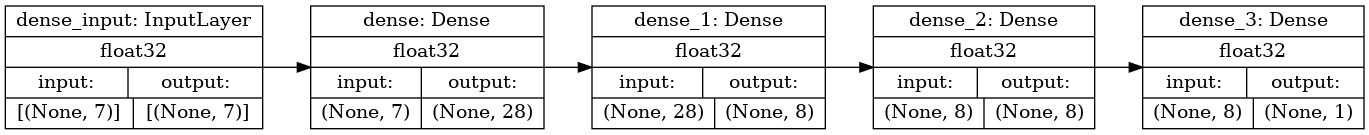

In [4]:
tf.keras.utils.plot_model(model, to_file="model3.png",
    show_shapes=True,
    show_dtype=True,
   
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 73)                5402      
_________________________________________________________________
dropout (Dropout)            (None, 73)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 35)                2590      
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                432       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [70]:
model.evaluate(x_test_normalized,y_test.values)

66/66 [==============================] - 1s 10ms/step - loss: 20.4118 - mae: 20.4118 - mape: 19.7164


[20.411773681640625, 20.411773681640625, 19.716354370117188]

In [40]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 50])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Anzahl]')
    plt.legend()
    plt.grid(True)

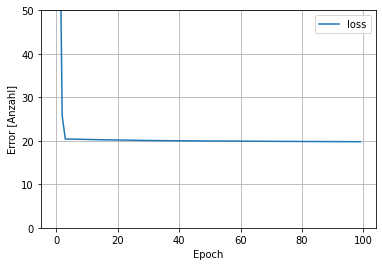

In [75]:
with tf.device('/device:CPU:0'):
    plot_loss(history)

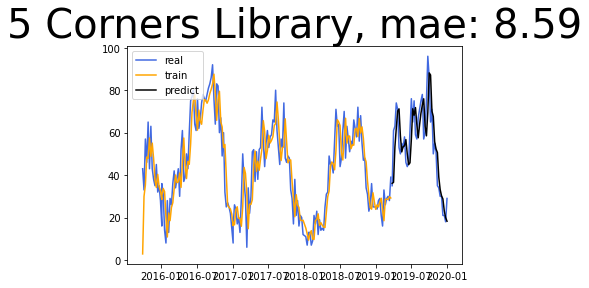

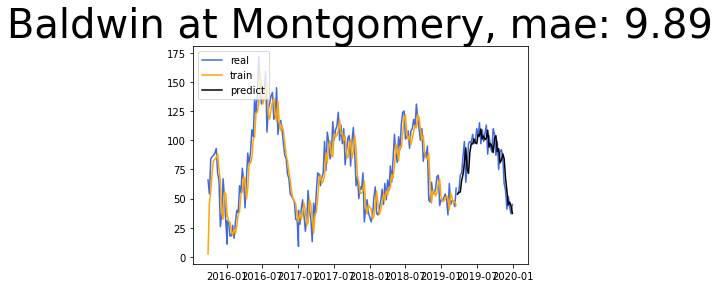

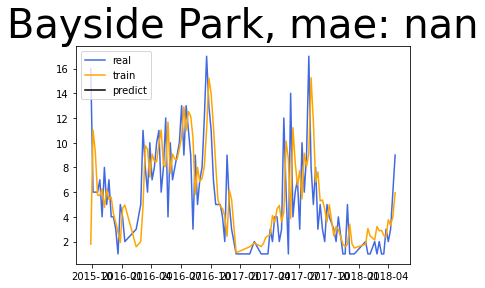

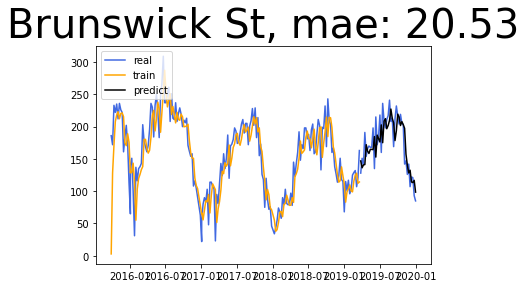

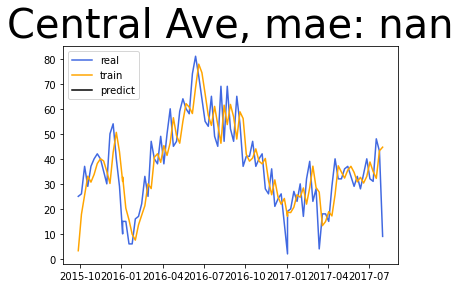

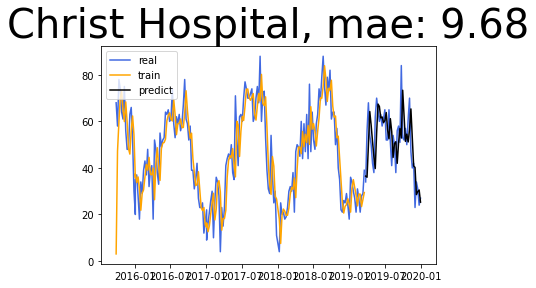

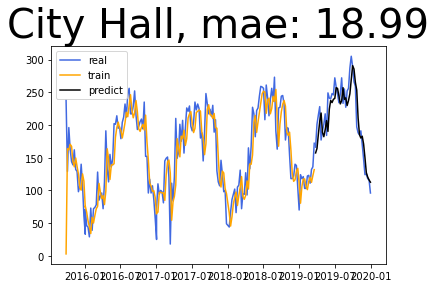

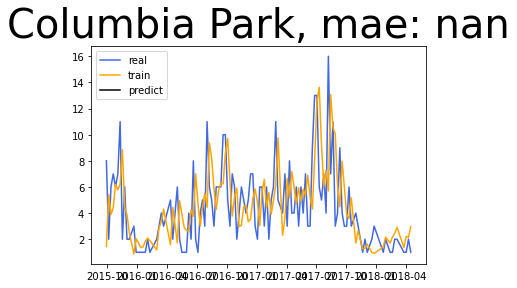

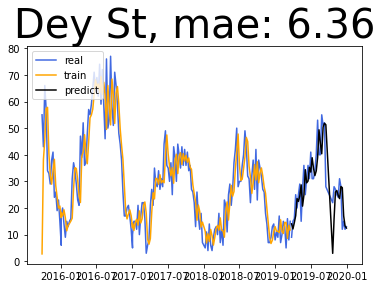

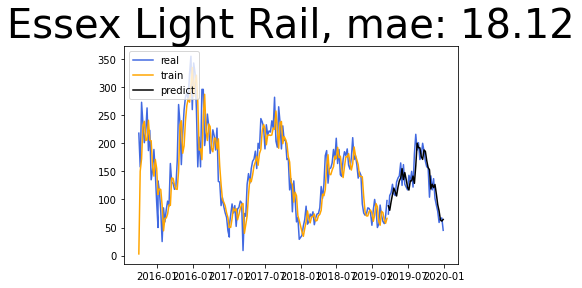

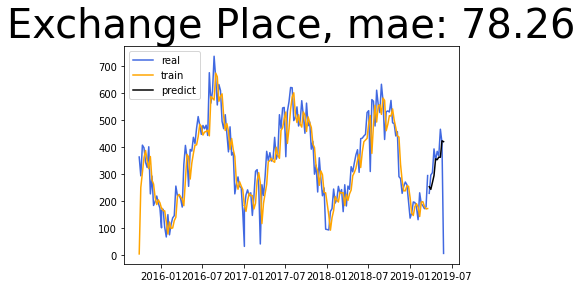

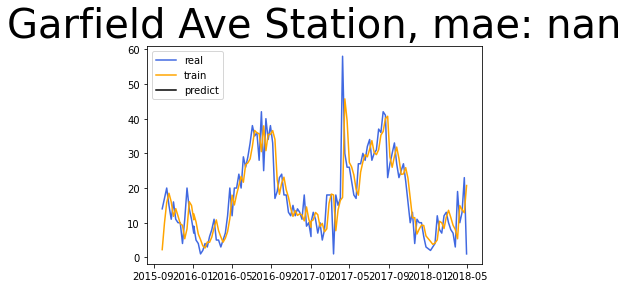

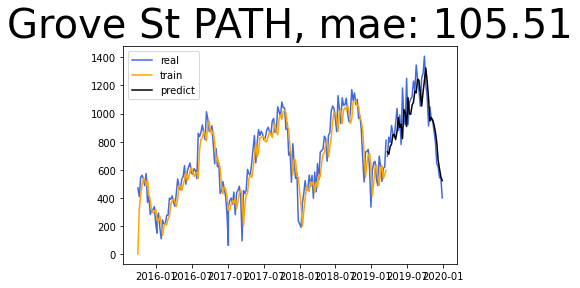

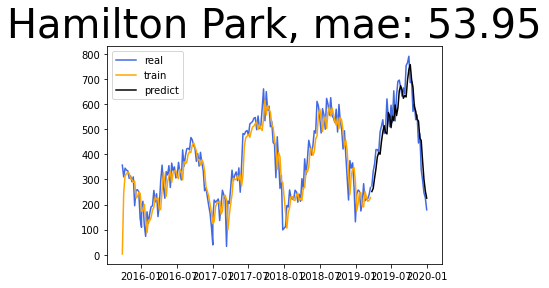

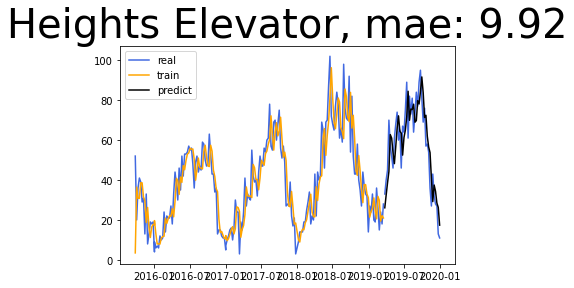

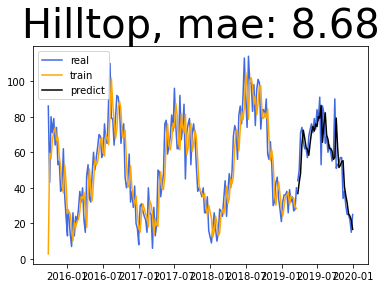

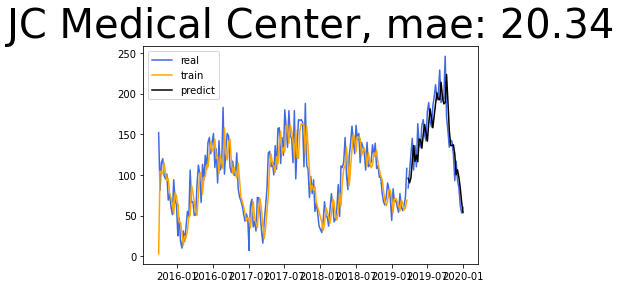

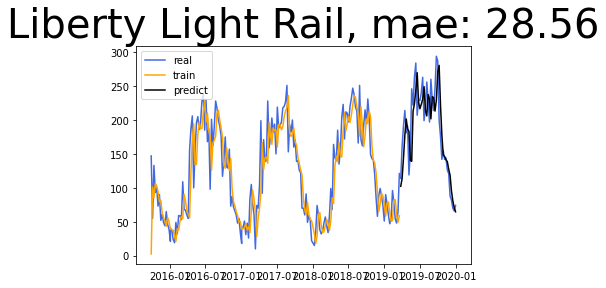

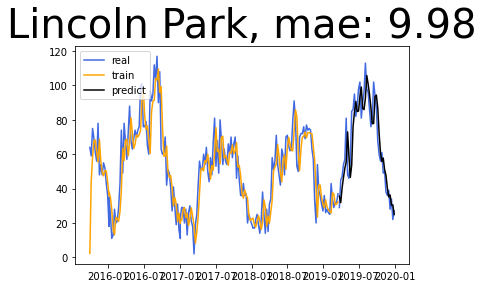

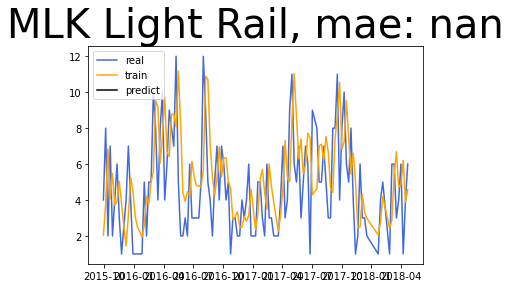

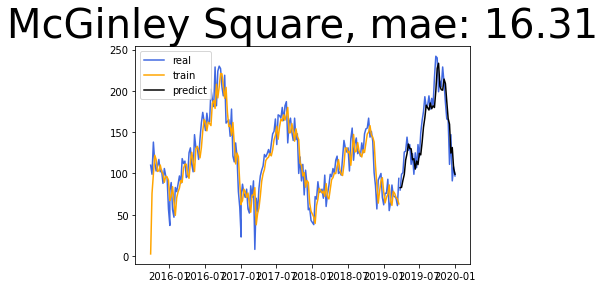

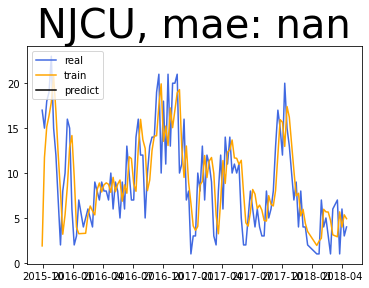

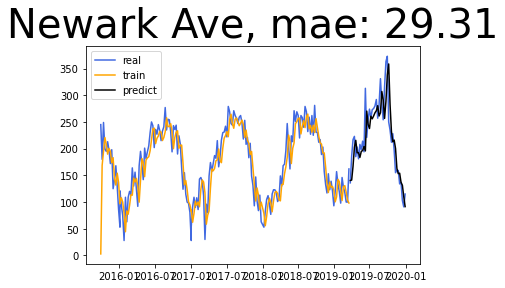

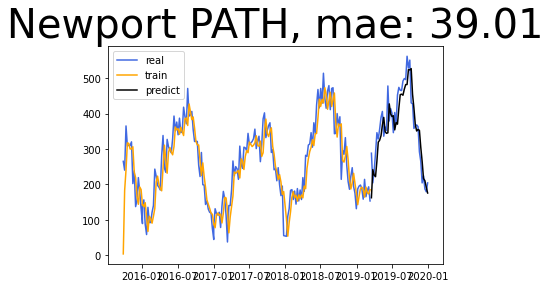

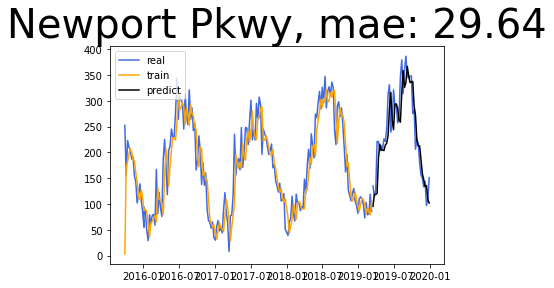

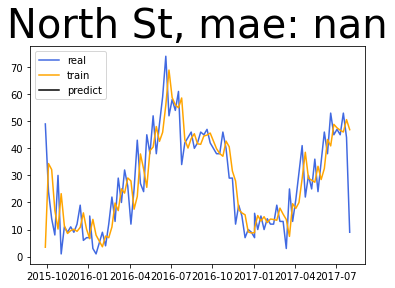

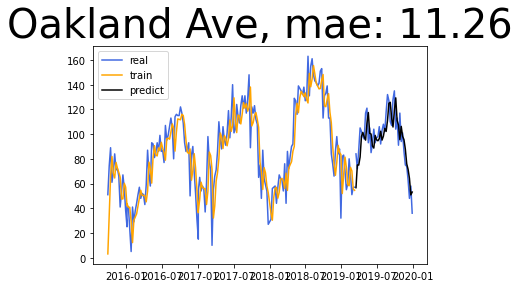

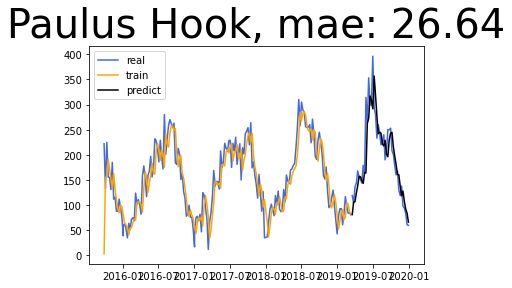

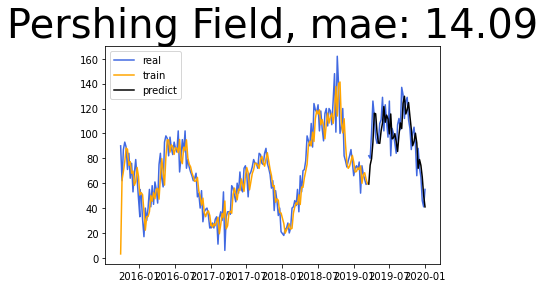

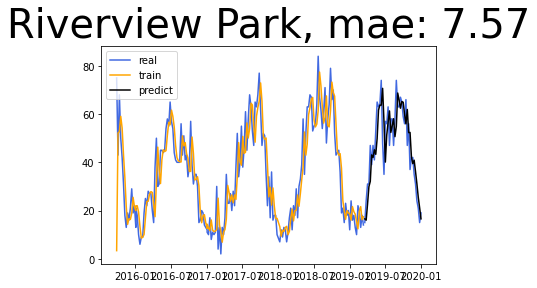

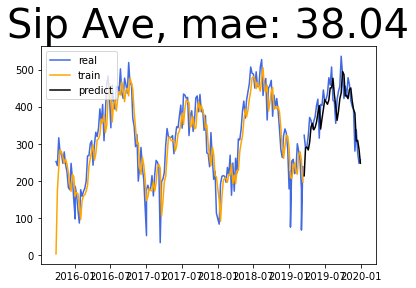

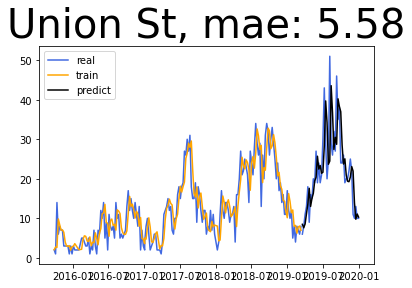

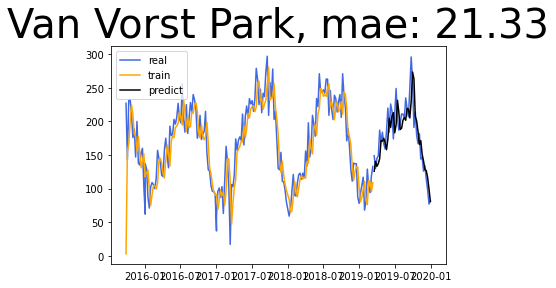

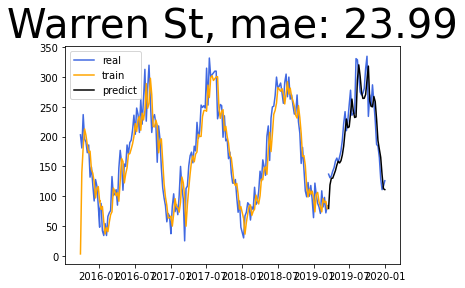

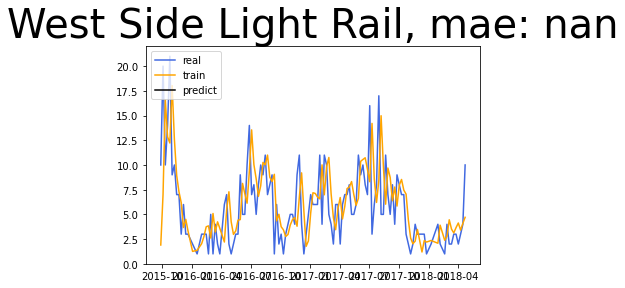

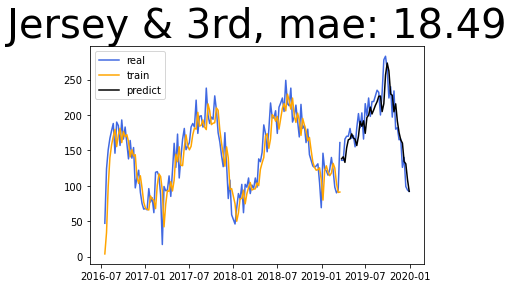

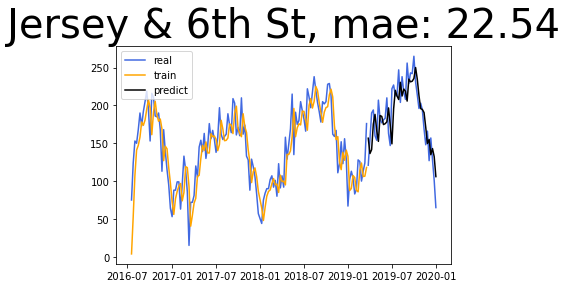

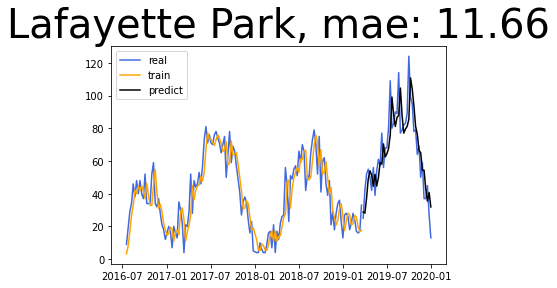

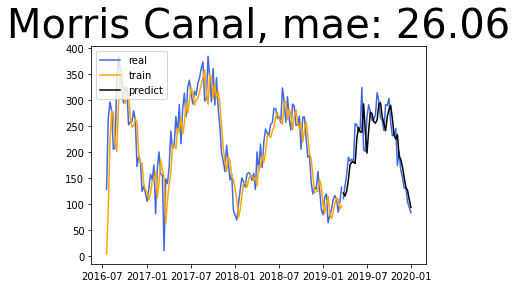

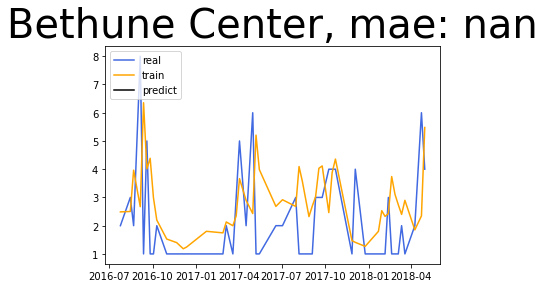

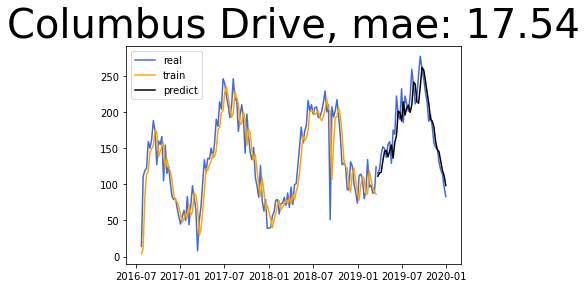

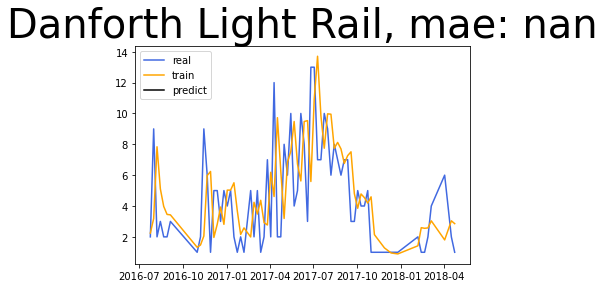

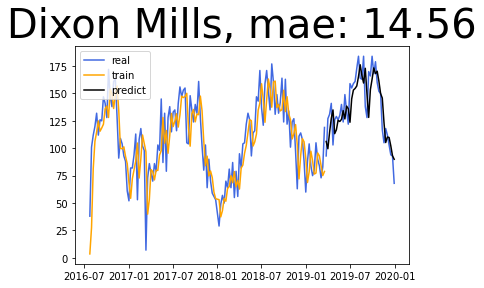

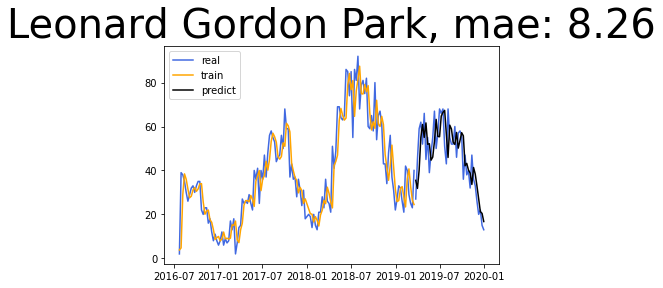

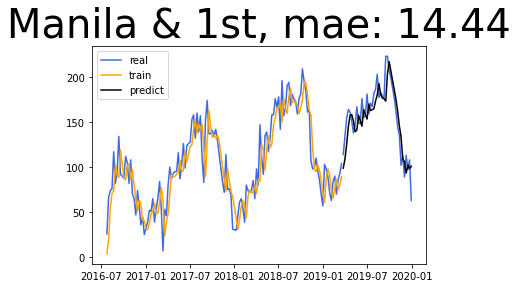

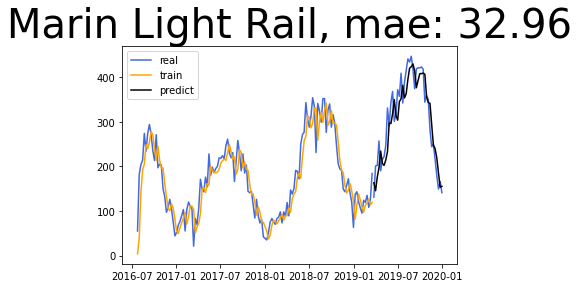

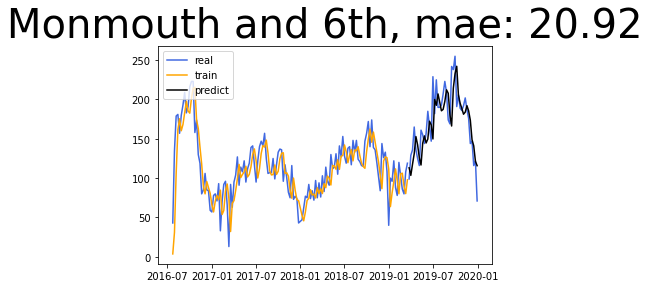

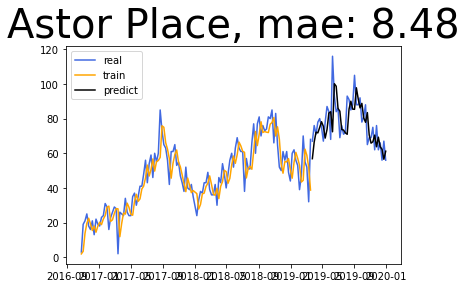

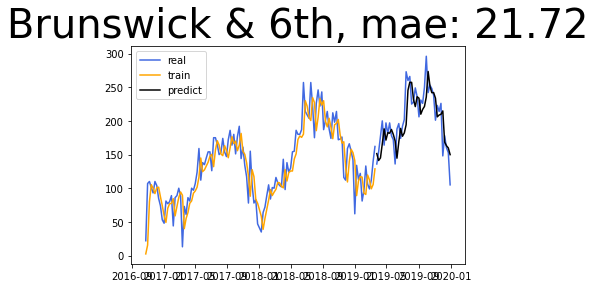

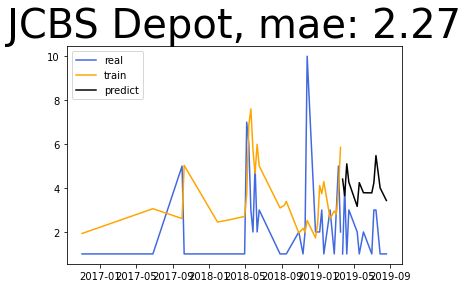

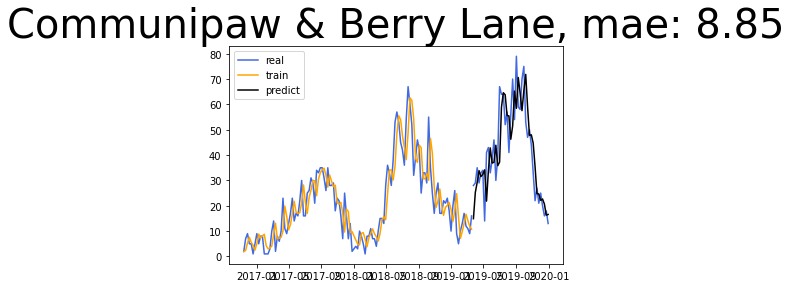

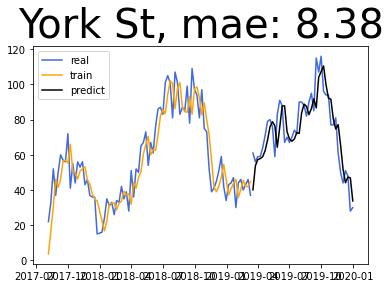

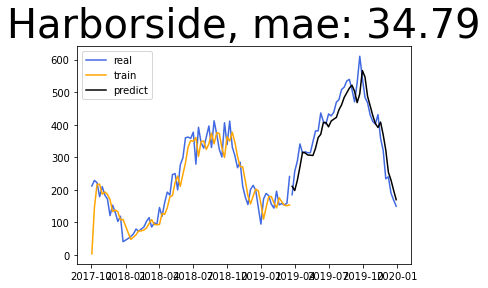

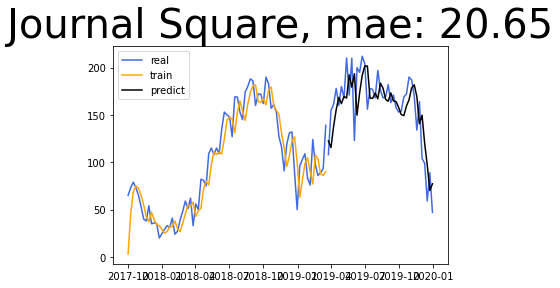

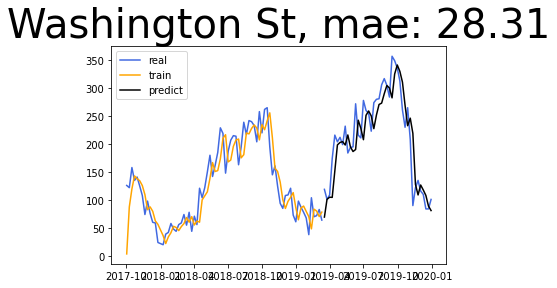

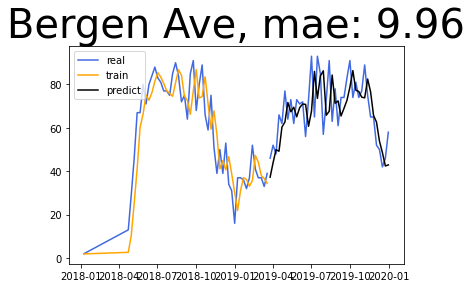

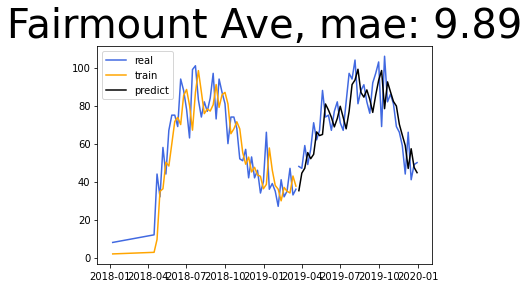

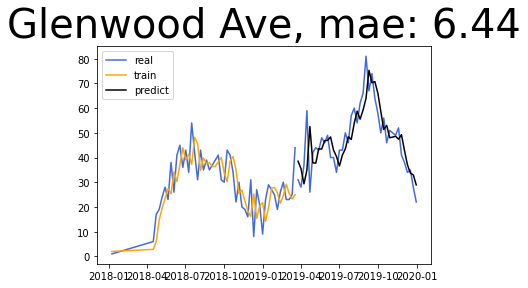

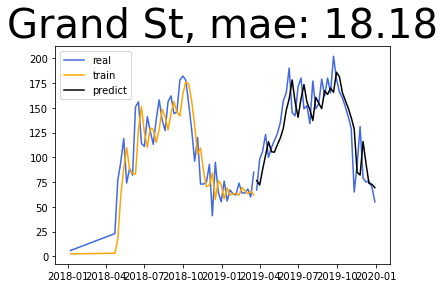

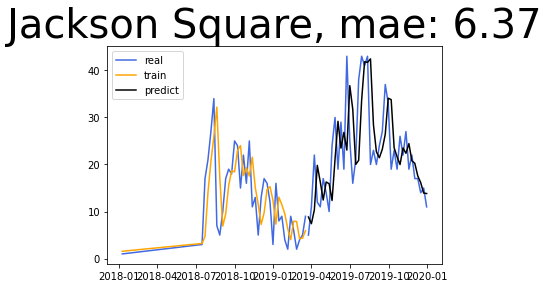

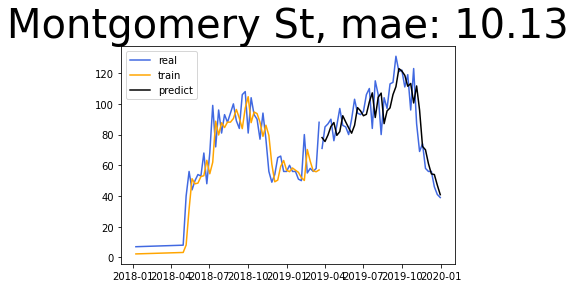

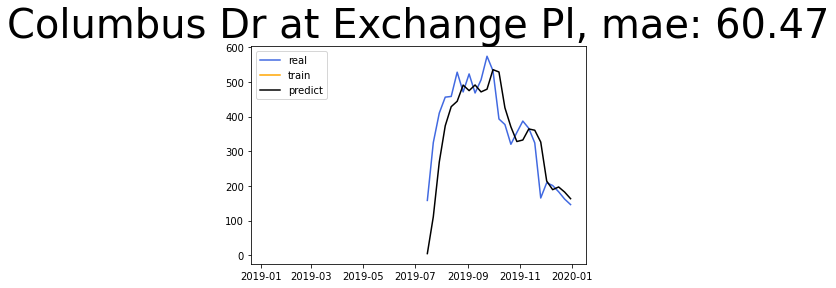

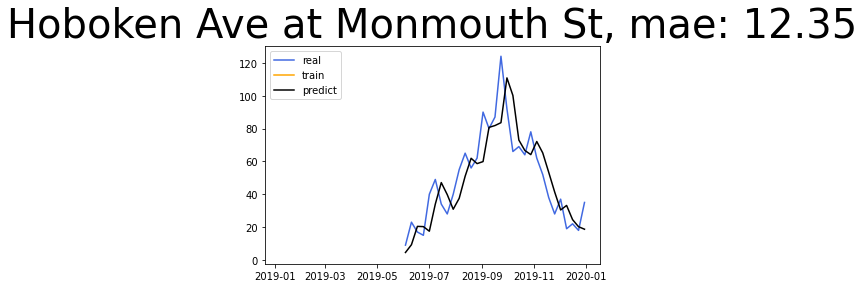

In [77]:
#show result data linear

for station in stationnames:
    predict_train = model.predict(x_train_normalized)
    y1 =  y_train 
    y2 =  predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)

    plt.plot(test1['yearweek'],test1['y'],label='real' , color = 'royalblue'  )
    plt.plot(test1['yearweek'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test2)
    #print(test2['y'])
    
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    plt.plot(test2['yearweek'],test2['y'],label='_Hidden' , color = 'royalblue'  )
    plt.plot(test2['yearweek'],test2['y2'],label='predict' , color = 'black' )
    
    plt.legend(loc="upper left")
    plt.savefig( 'Model3Images/'+station+'linear.jpg',bbox_inches='tight', dpi=150)
    plt.show()
 

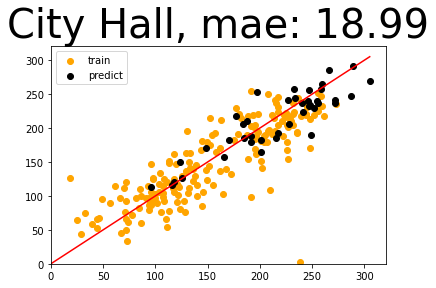

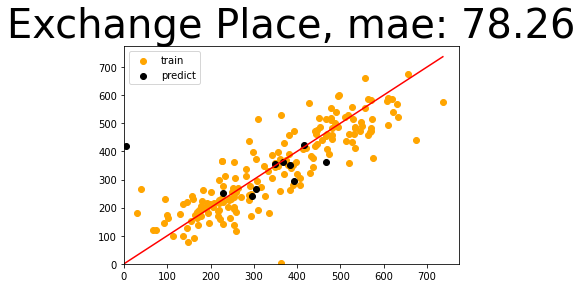

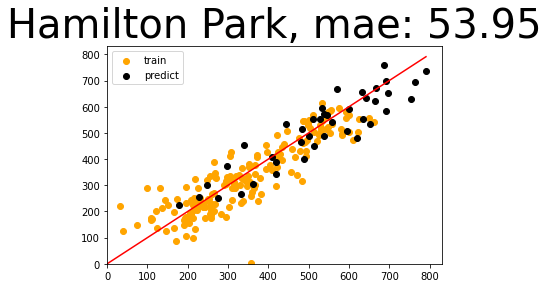

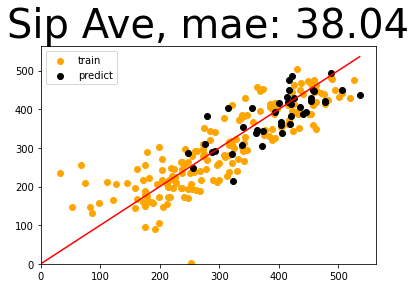

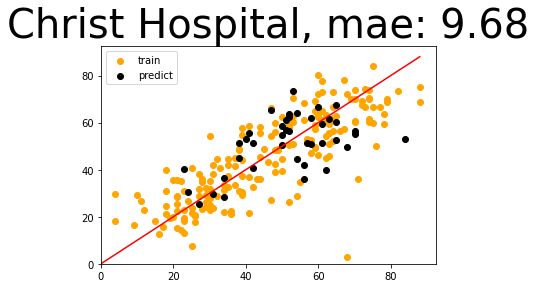

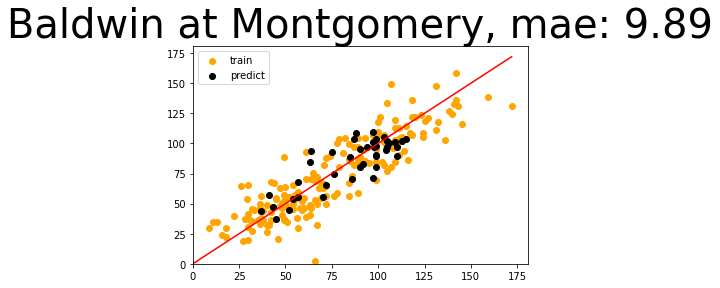

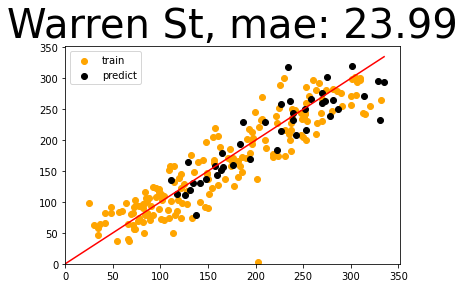

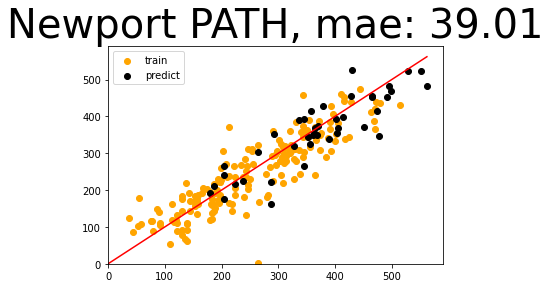

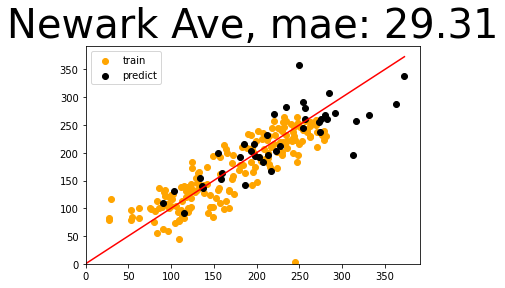

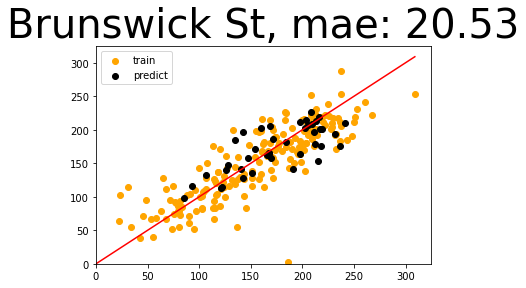

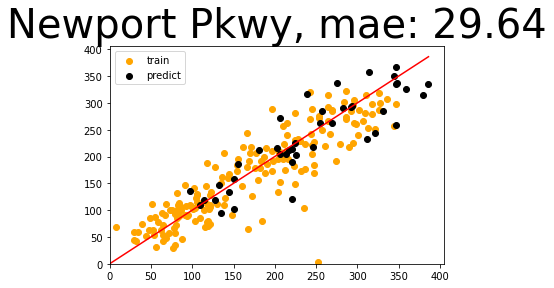

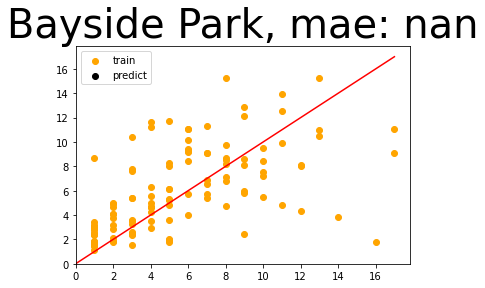

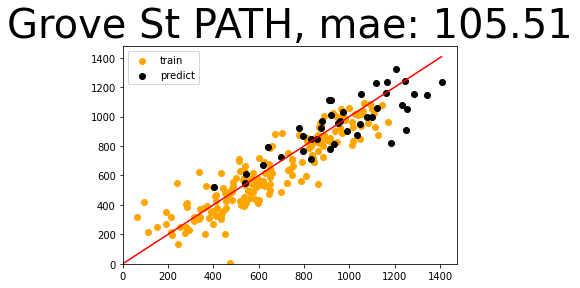

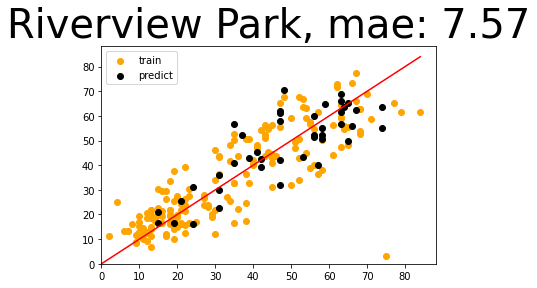

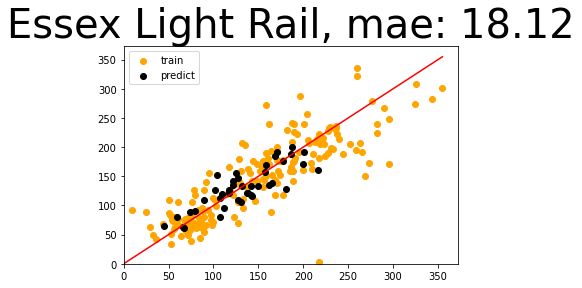

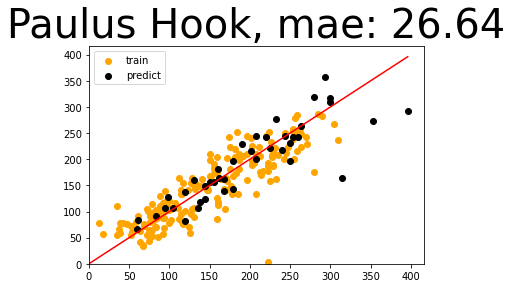

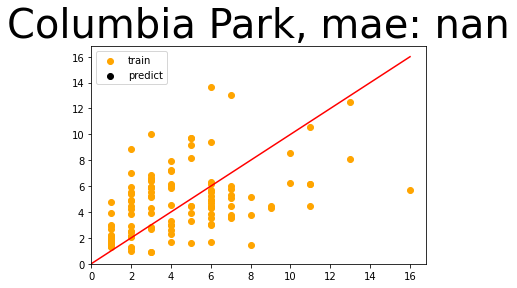

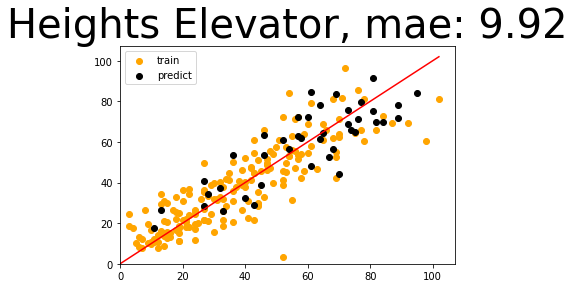

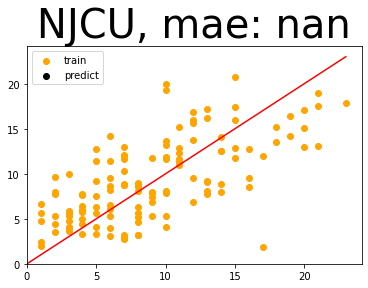

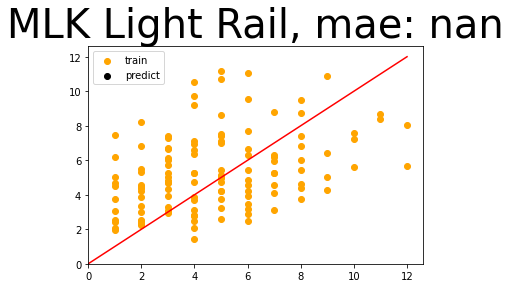

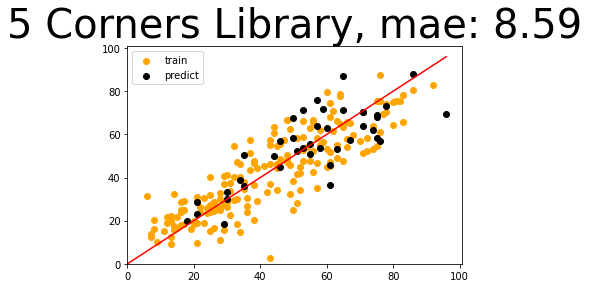

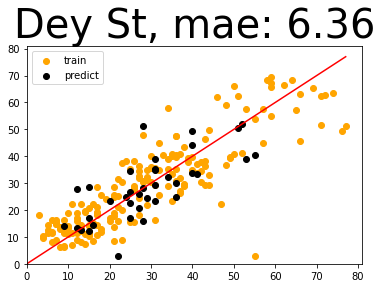

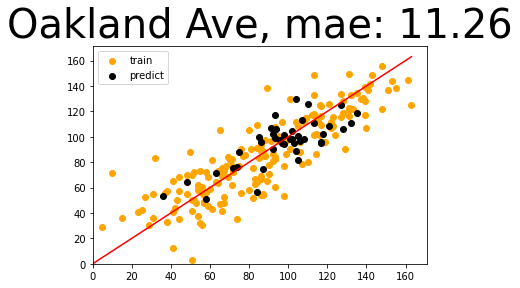

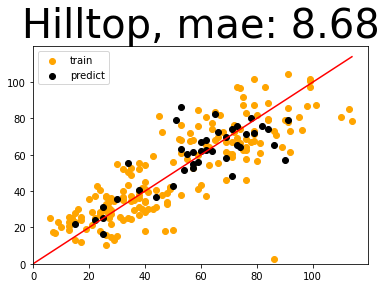

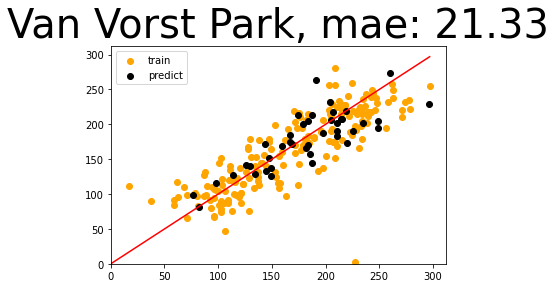

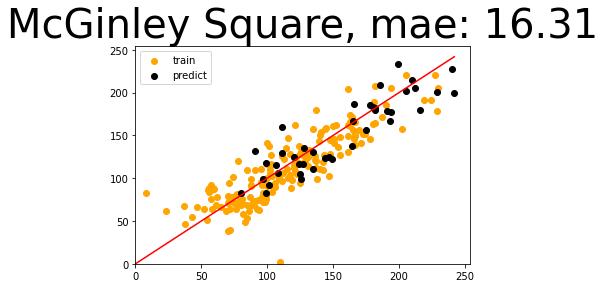

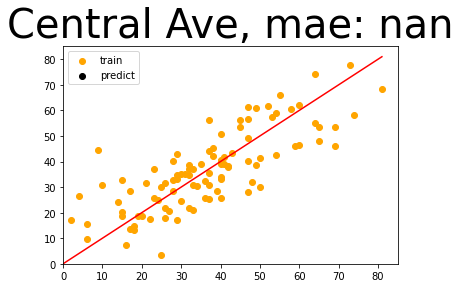

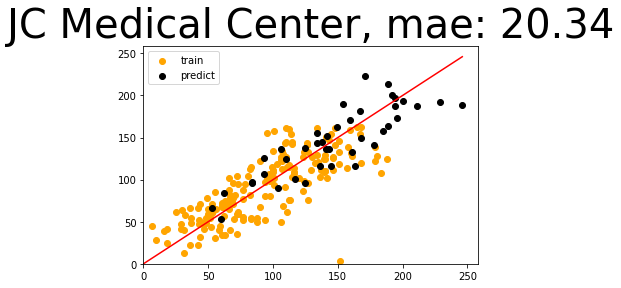

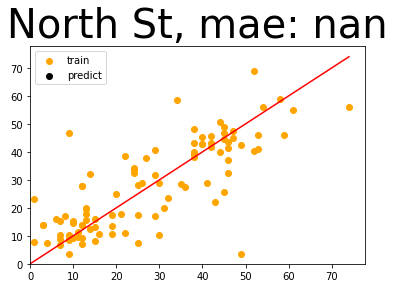

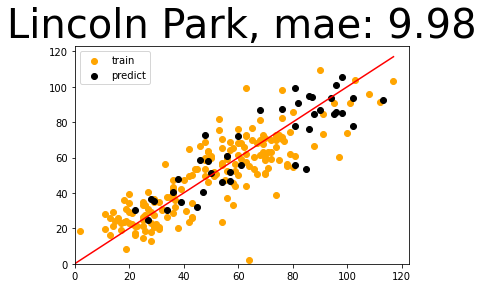

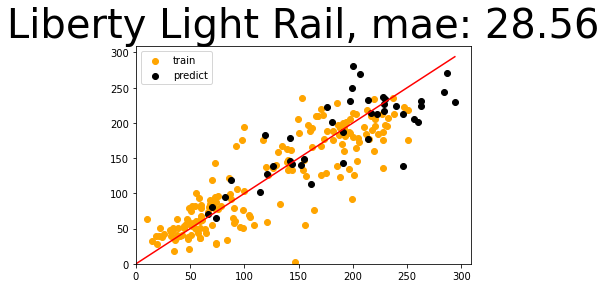

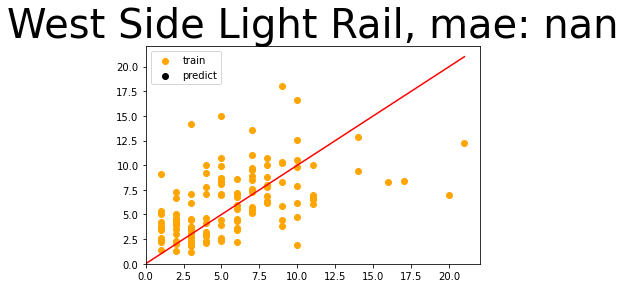

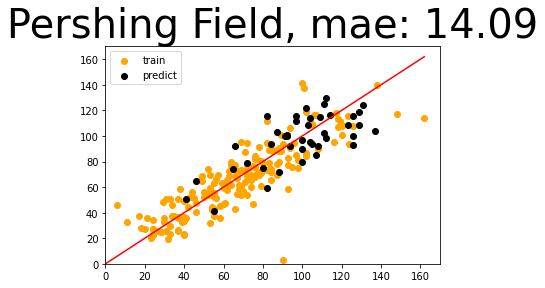

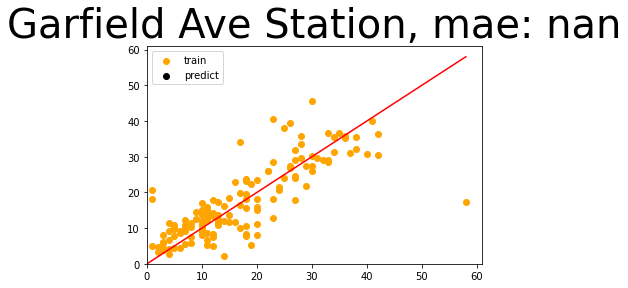

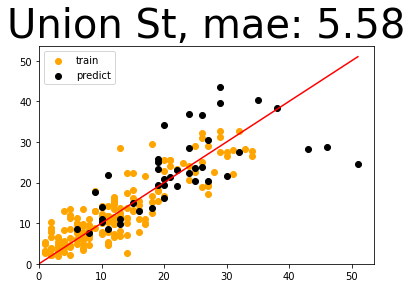

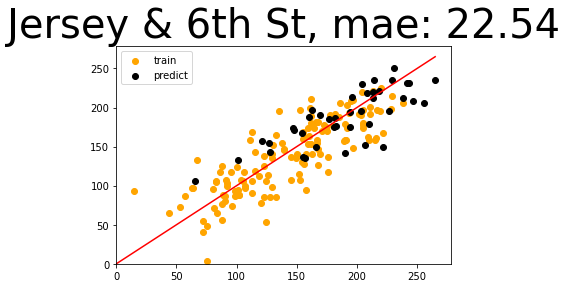

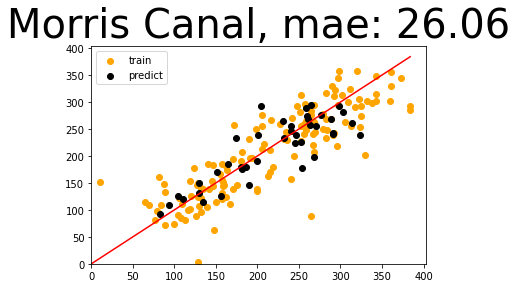

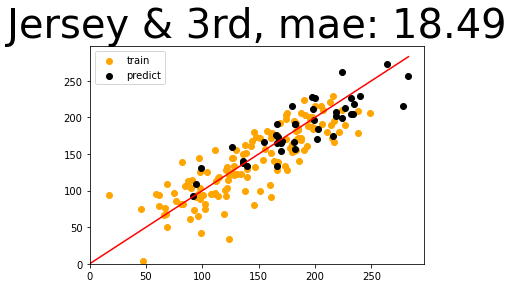

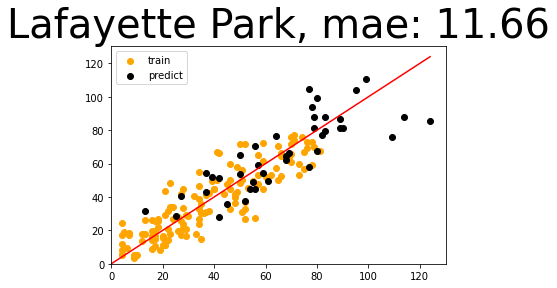

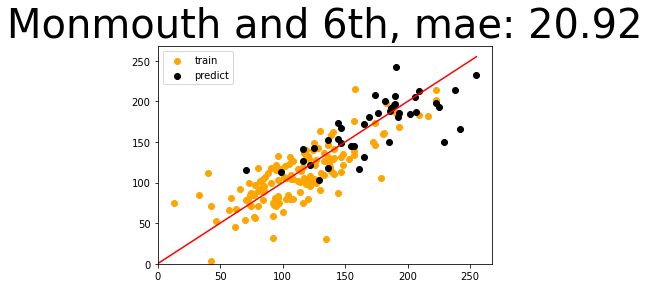

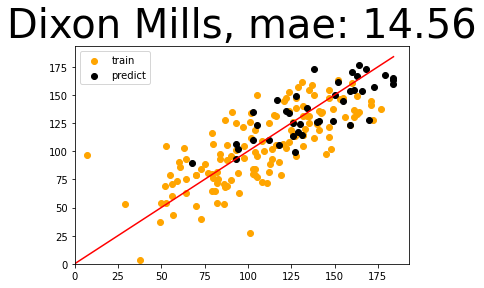

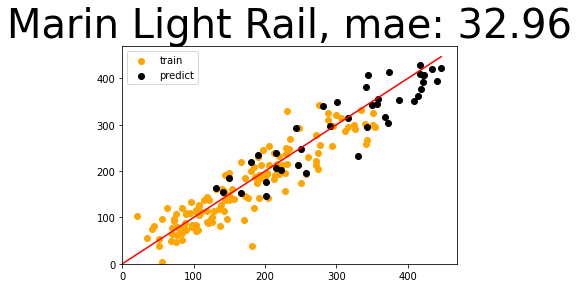

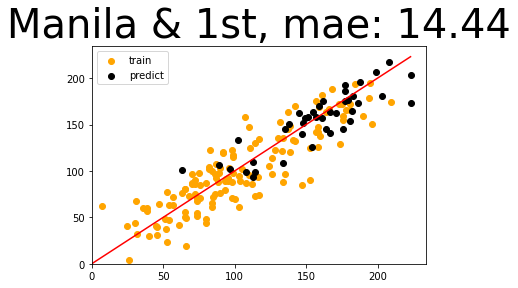

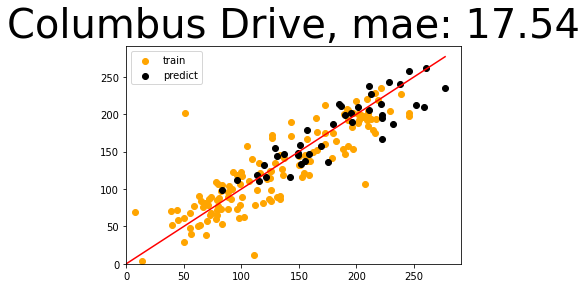

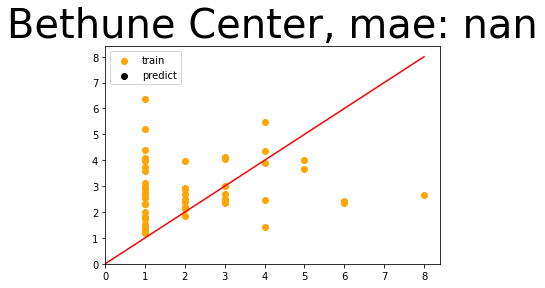

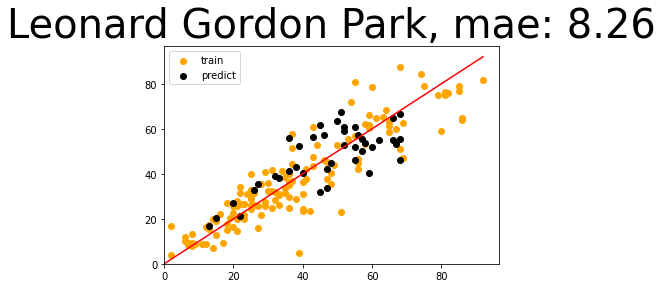

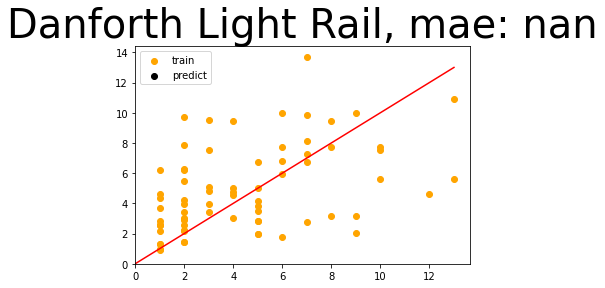

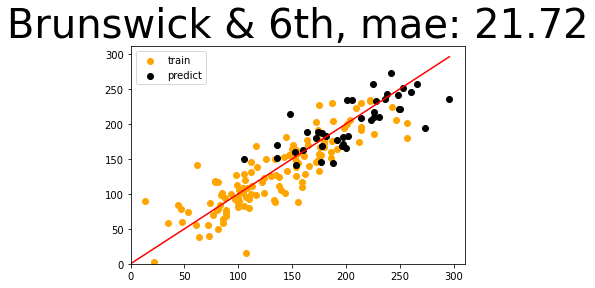

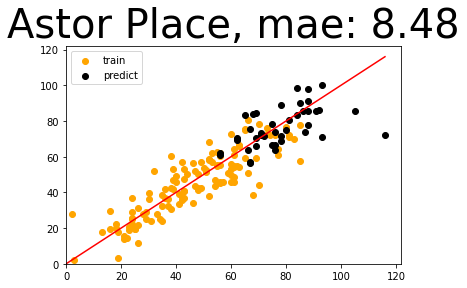

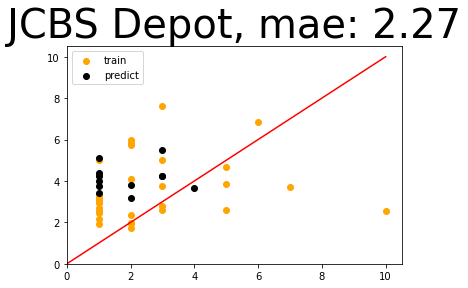

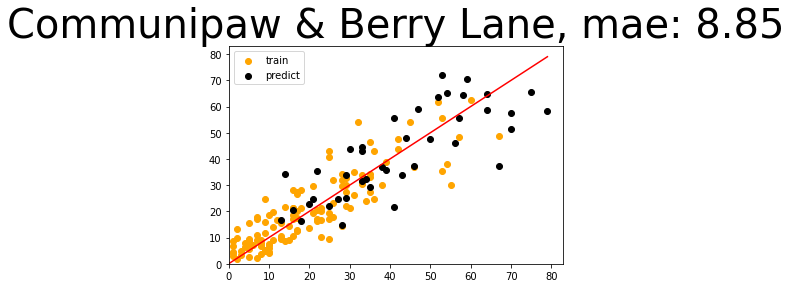

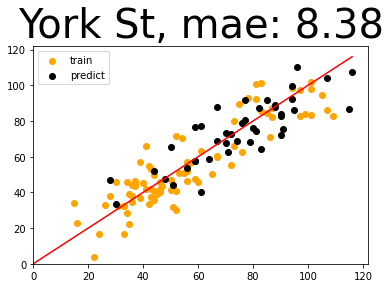

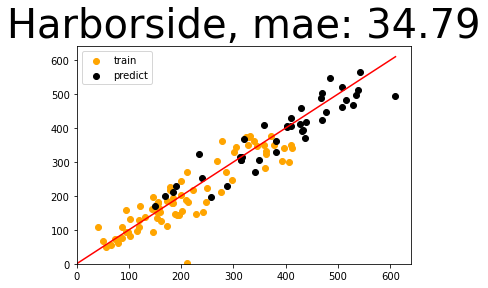

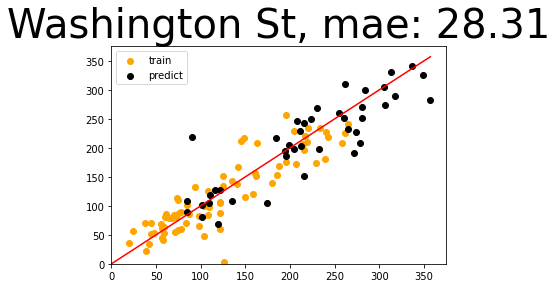

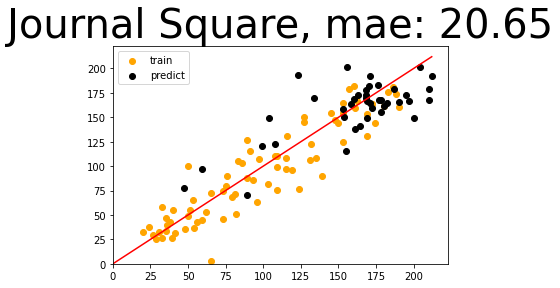

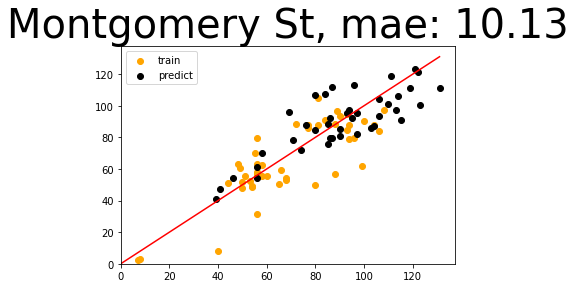

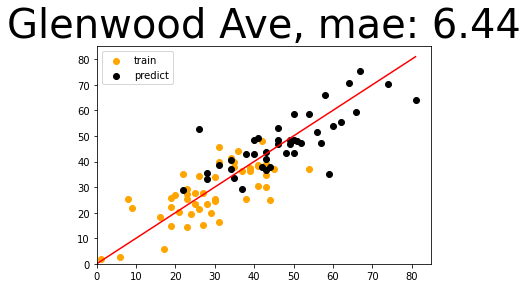

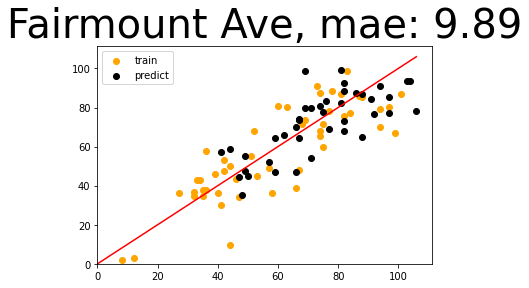

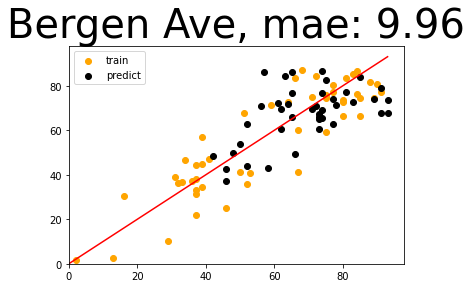

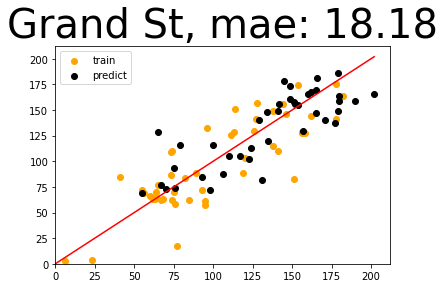

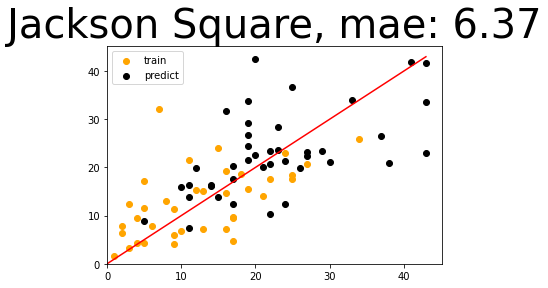

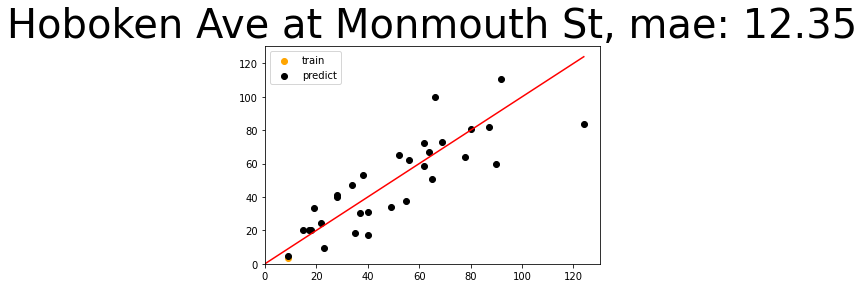

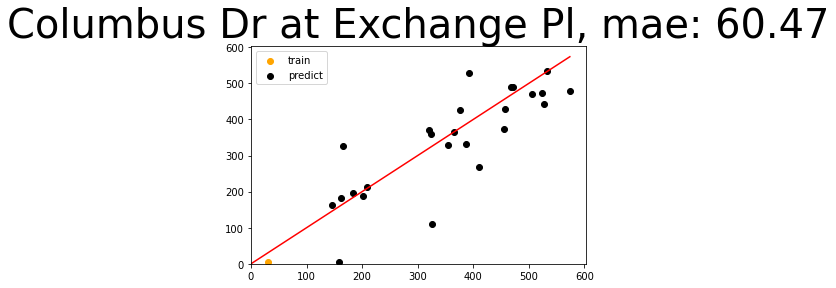

In [73]:
#show result data scatter

for station in stationnames:

    predict_train = model.predict(x_train_normalized)
    y1 =  y_train 
    y2 = predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    
    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)
     
   
    plt.scatter(test1['y'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    plt.scatter(test2['y'],test2['y2'],label='predict' , color = 'black' )
    #print(test2)
    maxdata1 = (test1['y'].max())if(test1['y'].max() > test1['y2'].max()) else test1['y2'].max()
    maxdata1 = int(maxdata1)
    maxdata2 = (test2['y'].max())if(test2['y'].max() > test2['y2'].max()) else test2['y2'].max()
    maxdata2 = int( 0 if(np.isnan(maxdata2)) else maxdata2)
    maxdata = (maxdata1)if(maxdata1 > maxdata2) else maxdata2
    maxdata = int(maxdata)
    
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    xline =   np.linspace(0,maxdata,maxdata)
    plt.plot([0,maxdata],[0,maxdata] , color='red')
    plt.ylim(bottom=0)
    plt.xlim(xmin=0)
    plt.legend(loc="upper left")
    plt.savefig( 'Model3Images/'+station+'scatter.jpg',bbox_inches='tight', dpi=150)
    plt.show()

In [74]:
with tf.device('/device:GPU:0'):
    results = model.evaluate(x_test_normalized, y_test.values )
print("Result", results)

66/66 [==============================] - 1s 11ms/step - loss: 20.4118 - mae: 20.4118 - mape: 19.7164
Result [20.411773681640625, 20.411773681640625, 19.716354370117188]


In [72]:
model.save('Model3')

INFO:tensorflow:Assets written to: Model3/assets
